<a href="https://colab.research.google.com/github/slickHnaa/Career_Accelerator_LP3-Classifcation/blob/main/01_G_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install jupyter-summarytools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import warnings

In [4]:
c_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP3/Telco-Customer-Churn.csv')
c_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dfSummary(c_data, is_collapsible = True)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customerID[object],1. 7590-VHVEG2. 3791-LGQCY3. 6008-NAIXK4. 5956-YHHRX5. 5365-LLFYV6. 5855-EIBDE7. 8166-ZZTFS8. 0129-KPTWJ9. 9128-CPXKI10. 9509-MPYOD11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)7,033 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,gender[object],1. Male2. Female,"3,555 (50.5%)3,488 (49.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
3,SeniorCitizen[int64],1. 02. 1,"5,901 (83.8%)1,142 (16.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
4,Partner[object],1. No2. Yes,"3,641 (51.7%)3,402 (48.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bwYnDMBRF0a9BhMlGwhhcjIuYYqcIdWOMtUhCNspiCog1gidE7qngYy6GBD9XSjFAwZnZ1cwuvQ8Z2LOUcu99xAj8PM8/IYSp9yGjyjnvzrlfgnvPhxCmdV3vMcZH72NGcxzHd0pp2rbtYmbE9oY3M4sxPpZlufU+ZlDX3geM4qv3AfgcxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yHizv48Aex8yIp5bHZ9z3lNKk/ER4L/knHcze/a+YwQMXtoxeDnJMeWDCm+2OrzFGjDlq8Bsrw1TvpOY7bVjyleHX+wN+FMXMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgw5TuJZ9SOKV8FZnttGLzUYfDS4AUKW2rfd+DJGgAAAABJRU5ErkJggg=="">",0(0.0%)
5,Dependents[object],1. No2. Yes,"4,933 (70.0%)2,110 (30.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIH

Questions

Do senior citizens have a higher churn rate than others?

Do customers with dependents have higher church rates?

Does age and gender contribute to the churn rate?

Is there a relationship between tunure and churn rate?

Does the contract term affect the churn rate?

Does number of services signed on to affect churn rate?

Hypothesis

The contract term affects attrition


Null Hypothesis

The contract tern does not affect attrition 


Alternate hypothesis

The contract term affects attrition

In [7]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
c_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
for column in c_data.columns:
  print(column, ':', c_data[column].nunique())


customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


In [10]:
c_data.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
c_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
with pd.option_context('display.max_rows', None):
    print(c_data['TotalCharges'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
5         820.5
6        1949.4
7         301.9
8       3046.05
9       3487.95
10       587.45
11        326.8
12       5681.1
13       5036.3
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19       1862.9
20        39.65
21       202.25
22        20.15
23       3505.1
24       2970.3
25       1530.6
26      4749.15
27         30.2
28      6369.45
29       1093.1
30      6766.95
31       181.65
32      1874.45
33         20.2
34        45.25
35       7251.7
36        316.9
37       3548.3
38      3549.25
39       1105.4
40        475.7
41      4872.35
42       418.25
43      4861.45
44       981.45
45       3906.7
46           97
47       144.15
48       4217.8
49       4254.1
50      3838.75
51       1426.4
52      1752.65
53        633.3
54      4456.35
55      1752.55
56       6311.2
57      7076.35
58        894.3
59       7853.7
60       4707.1
61       5450.7
62      

In [13]:
#Churn['gender'] = Churn['gender'].astype(bool)
#Churn['SeniorCitizen'] = Churn['SeniorCitizen'].astype(bool)
#Churn['Partner'] = Churn['Partner'].astype(bool)
#Churn['Dependents'] = Churn['Dependents'].astype(bool)
#Churn['Churn'] = Churn['Churn'].astype(bool)

In [14]:
c_data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

# Univariate and Bivariate Analysis

## Univariate Analysis

In [15]:
c_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Monthly Charges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

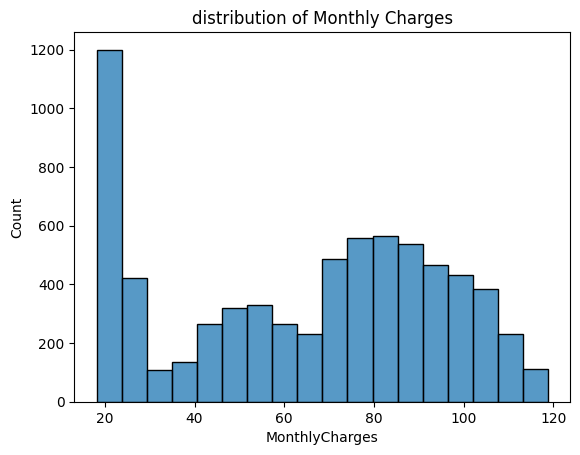

In [16]:
sns.histplot(x = 'MonthlyCharges', data = c_data).set(title = 'distribution of Monthly Charges')


#### Tenure

[Text(0.5, 1.0, 'Tunure Across Board')]

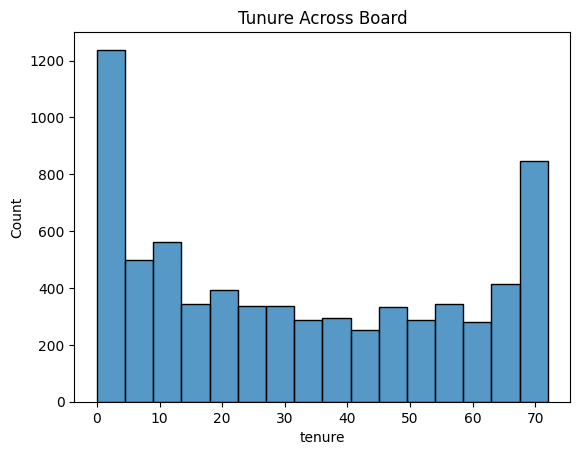

In [17]:
sns.histplot(x = 'tenure', data = c_data).set(title = 'Tunure Across Board')


#### **Senior Citizen**


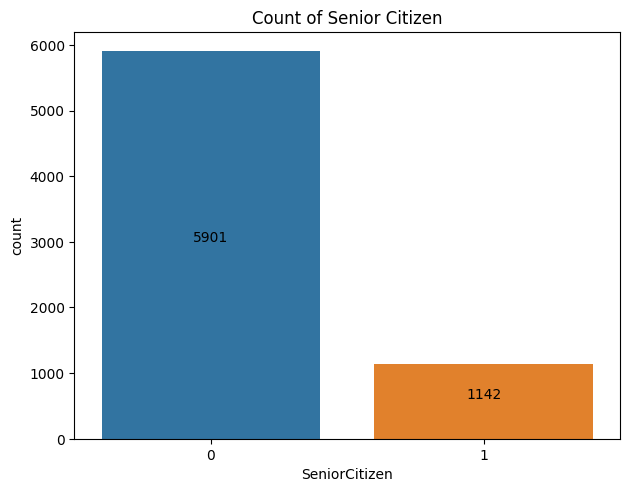

In [18]:
ax = sns.countplot(x='SeniorCitizen', data=c_data)
vc = c_data['SeniorCitizen'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Senior Citizen')
plt.show()

#### Gender

In [19]:
vc = c_data['gender'].value_counts()
vc

Male      3555
Female    3488
Name: gender, dtype: int64

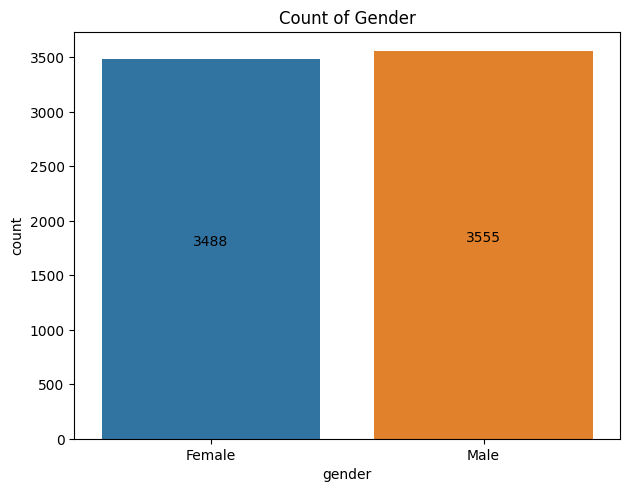

In [20]:
ax = sns.countplot(x='gender',data=c_data)
vc = c_data['gender'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Gender')
plt.show()

#### Churn

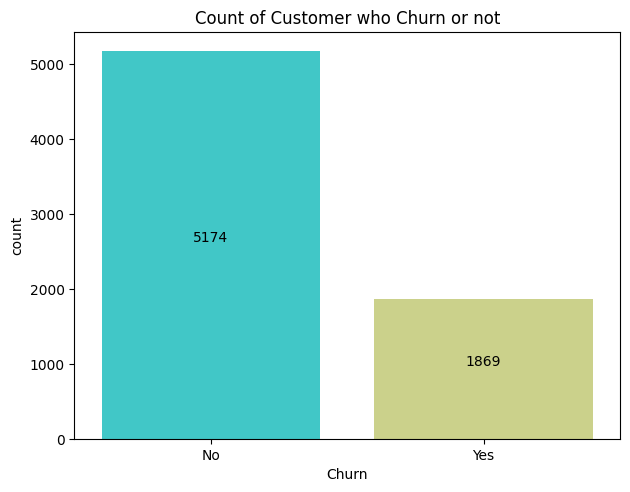

In [21]:
ax = sns.countplot(x='Churn',data=c_data, palette='rainbow')
vc = c_data['Churn'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customer who Churn or not')
plt.show()

### Dependents

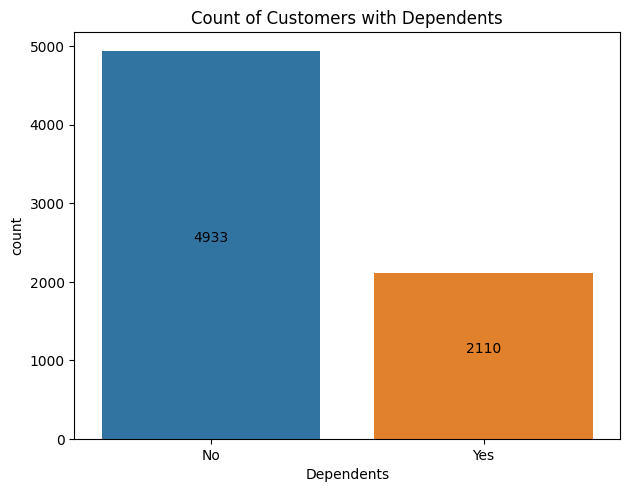

In [22]:
ax = sns.countplot(x='Dependents',data=c_data)
vc = c_data['Dependents'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers with Dependents')
plt.show()

## Bivariate Analysis

### Gender vs Tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

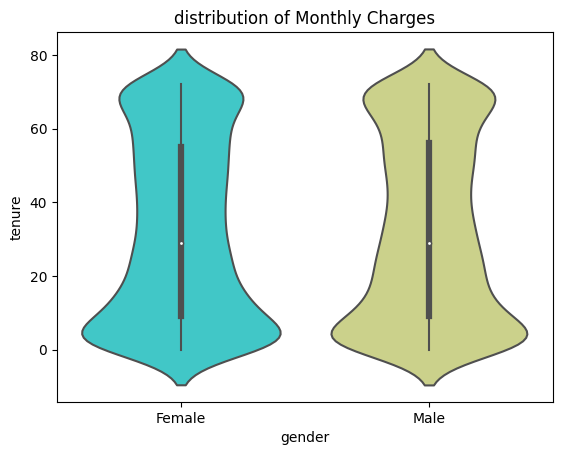

In [23]:
sns.violinplot(x='gender',y='tenure',data=c_data,palette='rainbow').set(title = 'distribution of Monthly Charges')


[Text(0.5, 1.0, 'distribution of Monthly Charges')]

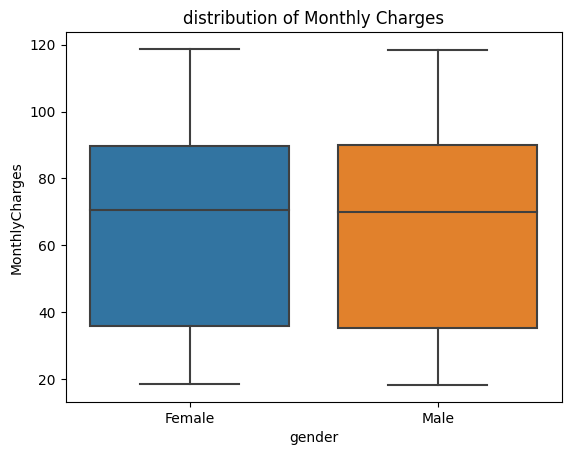

In [24]:
sns.boxplot(x='gender',y='MonthlyCharges',data=c_data).set(title = 'distribution of Monthly Charges')

### Dependents vs Tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

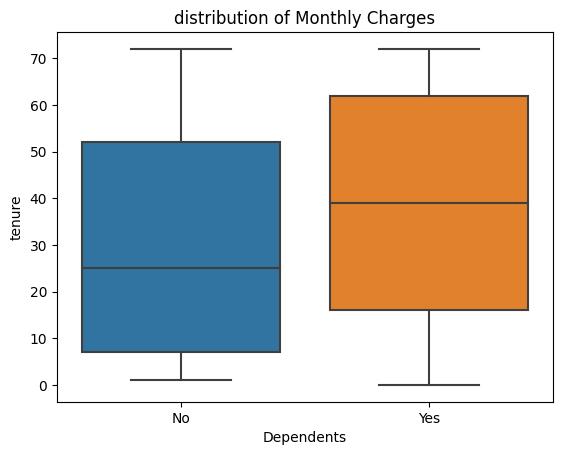

In [25]:
sns.boxplot(x='Dependents',y='tenure',data=c_data).set(title = 'distribution of Monthly Charges')


[Text(0.5, 1.0, 'distribution of Monthly Charges')]

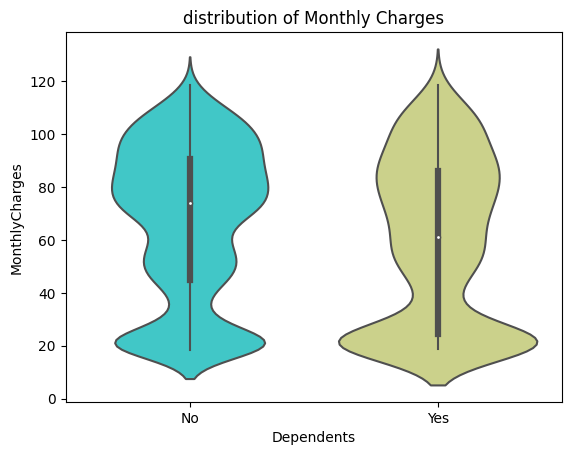

In [26]:
sns.violinplot(x='Dependents',y='MonthlyCharges',data=c_data, palette='rainbow').set(title = 'distribution of Monthly Charges')


### Churn vs tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

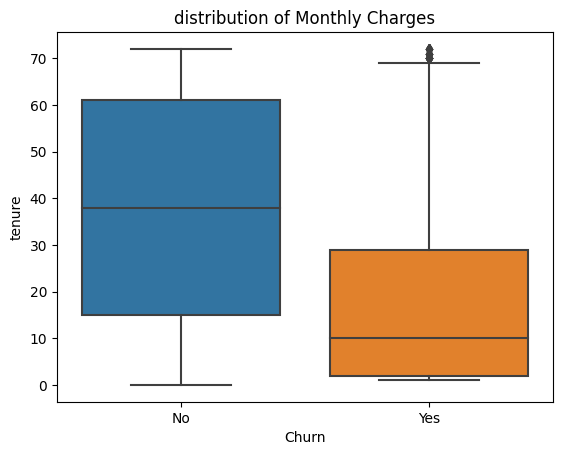

In [27]:
sns.boxplot(x='Churn',y='tenure', data=c_data).set(title = 'distribution of Monthly Charges')


[Text(0.5, 1.0, 'distribution of Monthly Charges')]

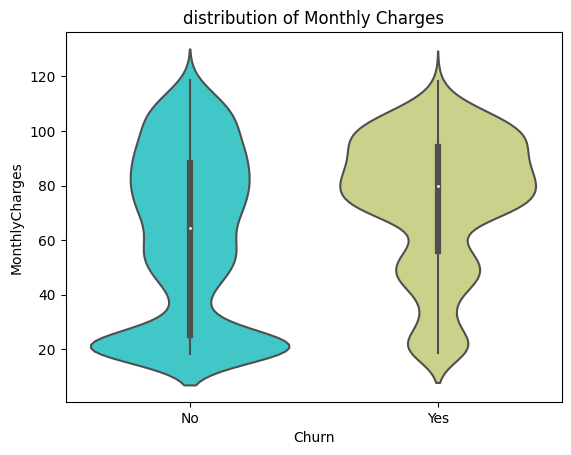

In [28]:
sns.violinplot(x='Churn',y='MonthlyCharges', data=c_data, palette='rainbow').set(title = 'distribution of Monthly Charges')


### Pairgrid

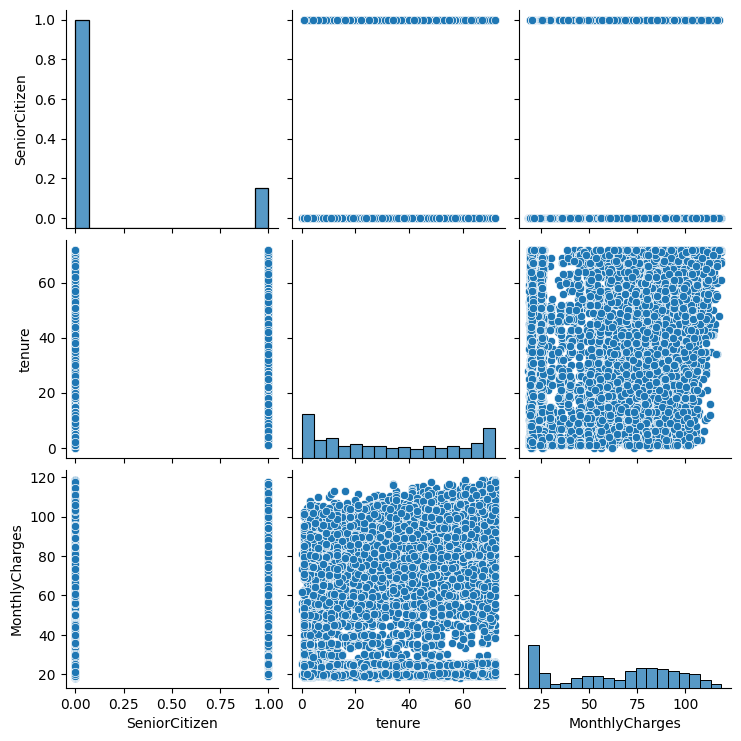

In [29]:
pair_grid = sns.pairplot(c_data)